# Math 638 Homework 5
Geneva Porter, 06 March 2019

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from IPython.display import display, Math
%matplotlib inline

## Problem 1 (6.1.8)

Plot a computer-generated phase portrait of the van der Pol oscillator.

$$
\left(\begin{array}{c}
    \dot{x} \\
    \dot{y}
\end{array}\right)=\left(\begin{array}{c}
    y \\
    -x+y(1-x^2) \\
\end{array}\right)
$$

Problem 6.5.7


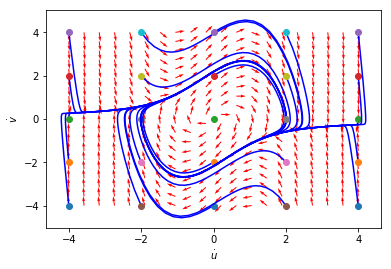

In [13]:
def f(Y, t):
    y1, y2 = Y
    return [y2, -y1+y2*(1-y1**2)]

y1 = np.linspace(-4,4, 20)
y2 = np.linspace(-4, 4, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]/np.sqrt(yprime[0]**2+yprime[1]**2)
        v[i,j] = yprime[1]/np.sqrt(yprime[0]**2+yprime[1]**2)
for y10 in [-4,-2,0,2,4]:
    for y20 in [-4,-2,0,2,4]:
        tspan = np.linspace(0, 5, 100)
        y0 = [y10, y20]
        ys = odeint(f, y0, tspan)
        plt.plot(ys[:,0], ys[:,1], 'b-')
        plt.plot([ys[0,0]], [ys[0,1]], 'o') # start


Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$\dot{u}$')
plt.ylabel('$\dot{v}$')
print 'Problem 6.5.7'

# code adapted from http://kitchingroup.cheme.cmu.edu...
# .../blog/2013/02/21/Phase-portraits-of-a-system-of-ODEs/

## Problem 2 (6.3.11)

Consider the system of polar coordinates given by 

$$
\left(\begin{array}{c}
    \dot{r} \\
    \dot{\theta}
\end{array}\right)=\left(\begin{array}{c}
    -r \\
    \frac{1}{\ln(r)} \\
\end{array}\right)
$$

### (a) find $r(t)$ and $\theta(t)$ explicitly, given an initial condition $(r_0,\theta_0)$.

First, we can readily find $r(t)$, since $\dot{r}$ is a typical ODE with solutions in the form of $r(t)=Ce^{-t}$. Given the initial condition $r(0)=r_0$, we can conclude that $C=r_0$ and therefore $$r(t)=r_0e^{-t}.$$

Next, we plug in $r(t)$ to $\dot{\theta}$:

$$ \dot{\theta}= \frac{1}{ln(r_0e^{-t})}=\frac{1}{ln(r_0)+ln(e^{-t})}=\frac{1}{ln(r_0)-t} $$

Integrating both sides yields:

$$ \theta(t)=\int\frac{dt}{\ln(r_0)-t}=-\ln(\ln(r_0)-t)+C $$

Using the initial condition $\theta(0)=\theta_0$, we get $C=\theta_0+\ln(\ln(r_0))$. Therefore,

$$ \theta(t)=-\ln(\ln(r_0)-t)+\theta_0+\ln(\ln(r_0))=\ln\left(\frac{\ln(r_0)}{\ln(r_0)-t}\right)+\theta_0$$

### (b) Show that $r(t)\longrightarrow0$ and $|\theta(t)|\longrightarrow\infty$ as $t\longrightarrow\infty$. Therefore the origin is a stable spiral for the nonlinear system.

First, we can show that $r(t)\rightarrow0$ as $t\rightarrow\infty$:

$$\lim_{t\to\infty}r_0e^{-t}=r_0\lim_{t\to\infty}\frac{1}{e^t}=0 $$

Since $r(t)\rightarrow0$, as $t\rightarrow\infty$, then $\ln(r(t))\rightarrow-\infty$ as $t\rightarrow\infty$. For $\theta(t)$ we have:

$$\lim_{t\to\infty}\left|\ln\left(\frac{\ln(r_0)}{\ln(r_0)-t}\right)+\theta_0 \right|= \lim_{a\to0}\left|\ln(a)+\theta_0\right|=\infty $$

Therefore, the origin is a stable spiral.

### (c) Write the system in $x,y$ coordinates.

Using $x=r\cos(\theta)$, $y=r\sin(\theta)$, and $r^2=x^2+y^2$, we have:

$$
\dot{x}=\dot{r}\cos\theta-r\sin(\theta)\dot{\theta} = -r\frac{x}{r}-y\frac{1}{\ln(r)}=-x-\frac{y}{\frac{1}{2}\ln(x^2+y^2)}
$$

$$
\dot{y}=\dot{r}\sin\theta+r\cos(\theta)\dot{\theta} = -r\frac{y}{r}+x\frac{1}{\ln(r)}=-y+\frac{x}{\frac{1}{2}\ln(x^2+y^2)}
$$

### (d) Show that the linearized system about the origin is $\dot{x}=-x,\dot{y}=-y.$ This the origin is a stable star for the linearized system.

To show this, first we must find the Jacobian matrix of this system:

$$J=\left(\begin{array}{cc}
-1+\frac{4xy}{\ln(x^2+y^2)^2} & \frac{4y^2}{\ln(x^2+y^2)^2} \\
-\frac{4x^2}{\ln(x^2+y^2)^2} & -1-\frac{4xy}{\ln(x^2+y^2)^2}
\end{array}\right)~~~\longrightarrow ~~~ \lim_{(x,y)\to(0,0)}J=\left(\begin{array}{cc}
-1 & 0 \\
0 & -1
\end{array}\right) $$

This gives us an eigenvalue of -1 with multiplicity 2. Therefore, our linearized system about the origin is:

$$ \left(\begin{array}{c}
\dot{x} \\
\dot{y}
\end{array}\right)=\left(\begin{array}{cc}
-1 & 0 \\
0 & -1
\end{array}\right)\left(\begin{array}{c}
x \\
y
\end{array}\right) $$

## Problem 3 (6.5.7)

The relativistic equation for the orbit of a planet around the sun is

$$ \frac{d^2u}{d\theta^2}+u=\alpha+\varepsilon u^2 $$

where $u=1/r$ and $r,\theta$ are the polar coordinates of the planet in its plane of motion. The parameter $\alpha$ is positive and can be found explicitly from classical Newtonian mechanics; the term $\varepsilon u^2$ is Einstein's correction. Here $\varepsilon$ is a very small positive parameter.

### (a) Rewrite the equation as a system in the $(u,v)$ phase plane, where $v=du/d\theta$.

Since $v=du/d\theta$, we can say that $\dot{u}=v$ and $\dot{v}=\frac{d^2u}{d\theta^2}$. This gives us the system:

$$ \left(\begin{array}{c}
\dot{u} \\
\dot{v}
\end{array}\right)=\left(\begin{array}{c}
v \\
\varepsilon u^2-u+\alpha
\end{array}\right) $$



### (b) Find all the equilibrium points of the system.

To find the equilibrium points, we set our system equal to (0,0). This results in $v^*=0$, and using the quadratic formula for $u$ yields:

$$ u^* = \frac{1\pm\sqrt{1-4\varepsilon\alpha}}{2\varepsilon} $$



### (c) Show that one of the equilibria is a center in the $(u,v)$ phase plane, according to the linearization. Is it a _nonlinear_ center?

To further investigate the dynamics of the system, we must find the Jacobian matrix:

$$J=\left(\begin{array}{cc}
0 & 1 \\
2\varepsilon u-1 & 0
\end{array}\right)$$

If we evaluate the Jacobian at the equilibrium $(v^*, u^*_+)$, we get:

$$J_{(v^*, u^*_+)}=\left(\begin{array}{cc}
0 & 1 \\
\sqrt{1-4\varepsilon\alpha} & 0
\end{array}\right) ~~~ \longrightarrow ~~~ \lambda_+ = \pm(1-4\varepsilon\alpha)^{1/4} $$

Since $4\varepsilon\alpha<<1$, the eigenvalues are real with opposite signs. Therefore, this equilibrium must be a saddle point.



If we evaluate the Jacobian at the equilibrium $(v^*, u^*_-)$, we get:

$$J_{(v^*, u^*_-)}=\left(\begin{array}{cc}
0 & 1 \\
-\sqrt{1-4\varepsilon\alpha} & 0
\end{array}\right) ~~~ \longrightarrow ~~~ \lambda_- = \pm i(1-4\varepsilon\alpha)^{1/4} $$

Here, the eigenvalues are purely imaginary. Therefore, this equilibrium must be a center. Since this system is conservative, this equilibrium is a nonlinear center. 


### (d) Show that the equilibrium point found in (c) corresponds to a circular planetary orbit.

By examining solution paths in the phase portrait on the $(u,v)$ plane, we can observe a circular orbit. (Assume $\varepsilon\approx0.01$ and $\alpha\approx2$)

Problem 6.5.7


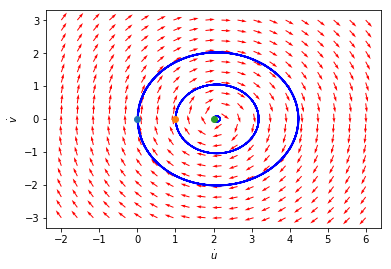

In [14]:
alpha = 2
epsilon = 0.01

def f(Y, t):
    y1, y2 = Y
    return [y2, alpha+2*epsilon*y1**2-y1]

y1 = np.linspace(-2,6, 20)
y2 = np.linspace(-3, 3, 20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]/np.sqrt(yprime[0]**2+yprime[1]**2)
        v[i,j] = yprime[1]/np.sqrt(yprime[0]**2+yprime[1]**2)
for y20 in [0,1,2]:
    tspan = np.linspace(0, 50, 200)
    y0 = [y20,0]
    ys = odeint(f, y0, tspan)
    plt.plot(ys[:,0], ys[:,1], 'b-')
    plt.plot([ys[0,0]], [ys[0,1]], 'o') # start

Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlabel('$\dot{u}$')
plt.ylabel('$\dot{v}$')
print 'Problem 6.5.7'

**Comments**: You can prove you have closed orbits around the fixed point using a conserved quantity as in lecture.  -2

## Problem 4 (6.5.15)

The motion of a bead on a rotating hoop is given by

$$ mr\ddot{\phi}=-b\dot{\phi}-mg\sin(\phi)+mr\omega^2\sin(\phi)\cos(\phi) $$

Consider the undamped case $b=0$.

### (a) Show that the equation can be nondimensionalized to $\phi''=\sin(\phi)(cos(\phi)-\gamma^{-1})$, where $\gamma=r\omega^2/g$ as before, and prime denotes differentiation with respect to dimensionless time $\tau=\omega t$.

If $b=0$, then our equation becomes

$$ mr\ddot{\phi}=-mg\sin(\phi)+mr\omega^2\sin(\phi)\cos(\phi) $$

Given $\tau=\omega t$, $d\tau=\omega dt$. Now we can write 

$$\frac{d}{dt}=\frac{d}{d\tau}\frac{d\tau}{dt}=\frac{d}{d\tau}\omega$$

Substituting these values into our equation, we get

$$ 
mr\frac{d^2\phi}{d\tau^2}\omega^2=-mg\sin(\phi)+mr\omega^2\sin(\phi)\cos(\phi) ~~~\longrightarrow ~~~\\
\frac{d^2\phi}{d\tau^2}=-\frac{g}{r\omega^2}\sin(\phi)+\sin(\phi)\cos(\phi) ~~~\longrightarrow ~~~\\
\frac{d^2\phi}{d\tau^2}=\sin(\phi)\left(\cos(\phi)-\frac{g}{r\omega^2}\right) ~~~\longrightarrow ~~~\\
\frac{d^2\phi}{d\tau^2}=\sin(\phi)\left(\cos(\phi)-\frac{1}{\gamma}\right)
 $$


### (b) Draw all the qualitatively different phase portraits as $\gamma$ varies.

First, we can create a system by saying $\dot{\phi}=v$:

$$ \left(\begin{array}{c}
\dot{\phi} \\
\dot{v}
\end{array}\right)=\left(\begin{array}{c}
v \\
\sin(\phi)\left(\cos(\phi)-\frac{1}{\gamma}\right)
\end{array}\right) $$

This gives us equilibria at $v=0$ and $\phi=n\pi,$ and $\cos^{-1}\left(\frac{1}{\gamma}\right)$. Since $\gamma$ is only defined for positive numbers, negative values of $\gamma$ are not included. Also, we can assume that $r$ and $g$ are constant, so the rotational acceleration $\omega$ will vary with $\gamma$. 

Problem 6.5.15


<IPython.core.display.Math object>

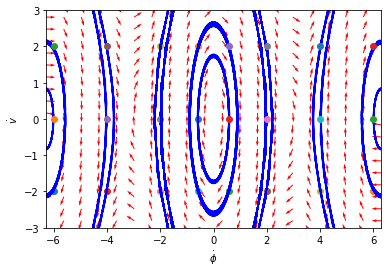

Problem 6.5.15


<IPython.core.display.Math object>

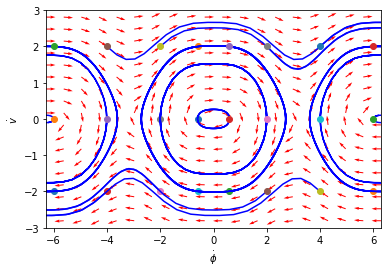

Problem 6.5.15


<IPython.core.display.Math object>

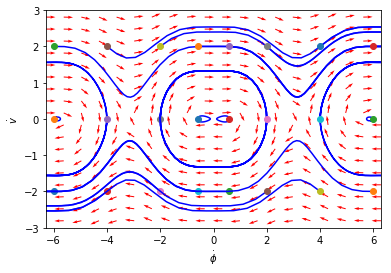

Problem 6.5.15


<IPython.core.display.Math object>

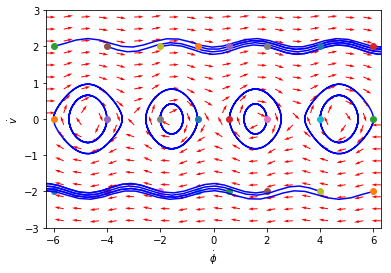

In [42]:
for P in [.1,.9,1.1,50]:
    gamma = P

    def f(Y, t):
        y1, y2 = Y
        return [y2,np.sin(y1)*(np.cos(y1)-1/gamma)]

    y1 = np.linspace(-6.28,6.28, 20)
    y2 = np.linspace(-3.14, 3.14, 20)
    Y1, Y2 = np.meshgrid(y1, y2)
    t = 0
    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)
    NI, NJ = Y1.shape

    for i in range(NI):
        for j in range(NJ):
            x = Y1[i, j]
            y = Y2[i, j]
            yprime = f([x, y], t)
            u[i,j] = yprime[0]/np.sqrt(yprime[0]**2+yprime[1]**2)
            v[i,j] = yprime[1]/np.sqrt(yprime[0]**2+yprime[1]**2)
    for y10 in [-6,-4,-2,-.6,.6,2,4,6]:
        for y20 in [-2,0,2]:
            tspan = np.linspace(0, 20, 100)
            y0 = [y10,y20]
            ys = odeint(f, y0, tspan)
            plt.plot(ys[:,0], ys[:,1], 'b-')
            plt.plot([ys[0,0]], [ys[0,1]], 'o') # start

    Q = plt.quiver(Y1, Y2, u, v, color='r')
    plt.xlim([-6.28, 6.28])
    plt.ylim([-3,3])

    plt.xlabel('$\dot{\phi}$')
    plt.ylabel('$\dot{v}$')
    print "Problem 6.5.15"
    display(Math("\gamma=%r" % gamma))
    plt.show()

**Comments**: While your plots are fine, maybe chat with some of the other students and get their code and insights on how to make some more readily readable plots.

### (c) What do the phase portraits imply about the physical motion of the bead?

From the phase plots with $\gamma=0.1$ and $\gamma=0.9$, we see that the fixed points occur only at $n\pi$, as $\cos^{-1}\left(\frac{1}{\gamma}\right)$ is not defined for $0<\gamma<1$. The origin is stable here, indicating that if the bead is perturbed near the bottom of the hoop, it will stay near the bottom . This aligns with a small $\omega$ value; if the hoop is rotating slowly, gravity has more influence than rotational acceleration.


Once $\gamma$ reaches 1, $\cos^{-1}\left(\frac{1}{\gamma}\right)$ is defined. For $\gamma>1$, the number of fixed points doubles and the origin becomes unstable. Now the rotational acceleration is large enough that the bead is stable at a $90\deg$ angle from the bottom of the hoop. Gravity is no longer the driving factor for stability, centripetal force is.


## Problem 5 (6.7.4)

Suppose a pendulum governed by $\ddot{\theta}+\sin(\theta)=0$ is swinging with an amplitude $\alpha$. Using some tricky manipulations, we are going to derive a formula for $T(\alpha)$, the period of the pendulum.

### (a) Using conservation of energy, show that $\dot{\theta}^2=2(\cos(\theta)-\cos(\alpha))$ and hence that $$ T=4\int_0^\alpha\frac{d\theta}{[2(\cos(\theta)-\cos(\alpha))]^{1/2}}.$$


Since we have $\ddot{\theta}+\sin(\theta)=0$, we can say

$$ \dot{\theta}\ddot{\theta}+\dot{\theta}\sin(\theta)=0 ~~\text{and}~~ $$

$$ \frac{d}{dt}\frac{1}{2}\dot{\theta}^2-\frac{d}{dt}\cos(\theta)=0 $$.

Integrating both sides, we get 

$$ \frac{1}{2}\dot{\theta}^2-\cos(\theta)=C $$

for some constant $C$. Now, we can make some inferences about the function $\theta(t)$. First, given the amplitude $\theta_{max}=\alpha$ and the law of conservation of energy, we can say that $\theta(0)=\alpha$. Also, because the angular velocity of a pendulum is zero at the height of a swing, $\dot{\theta}(0)=0$. We can solve for $C$ using these initial conditions, so that $-\cos(\alpha)=C$. Now we have:

$$ \dot{\theta}^2=2(\cos(\theta)-\cos(\alpha)) $$

Solving for $\dot\theta=\frac{d\theta}{dt}$, we have

$$ \frac{d\theta}{dt}=[2(\cos\theta-\cos\alpha)]^{1/2} $$

Since the period is positive, we can exclude the negative solution here. Separating the variables, we get

$$ dt = \frac{d\theta}{[2(\cos\theta-\cos\alpha)]^{1/2}} $$

And thus

$$T=4\int_0^\alpha\frac{d\theta}{[2(\cos\theta-\cos\alpha)]^{1/2}} $$


### (b) Using the half-angle formula, show that $$ T=4\int_0^\alpha\frac{d\theta}{\left[4\left(\sin^2\left(\frac{1}{2}\alpha\right)-\sin^2\left(\frac{1}{2}\theta\right)\right)\right]^{1/2}}. $$

The half-angle identity tells us that

$$ \sin\left(\frac{\theta}{2}\right) = \pm\sqrt{\frac{1-\cos\theta}{2}} $$

So we can substitute $\cos\theta=1-2\sin^2\left(\frac{\theta}{2}\right)$. This gives us

$$ T=4\int_0^\alpha\frac{d\theta}{\left[4\left(\sin^2\left(\frac{1}{2}\alpha\right)-\sin^2\left(\frac{1}{2}\theta\right)\right)\right]^{1/2}}. $$

### (c) The formulations in parts (a) and (b) have the disadvantage that $\alpha$ appears in both the integrand and the upper limit of integration. To remove the $\alpha$-dependence from the limits of integration, we introduce a new angle $\phi$ that runs form 0 to $\frac{\pi}{2}$ when $\theta$ runs from 0 to $\alpha$. Specifically, let $\sin\frac{\alpha}{2}\sin\phi=\sin\frac{\theta}{2}$. Using this substitution, rewrite (b) as an integral with respect to $\phi$. Thereby derive the exact result $$ T=4\int_0^{\pi/2}\frac{d\phi}{\cos\frac{\theta}{2}}=4K\left[\sin^2\frac{\alpha}{2}\right],$$ where the _complete elliptic integral of the first kind_ is defined as $$K(m)=\int_0^{\pi/2}\frac{d\phi}{\left(1-m\sin^2\phi\right)^{1/2}},~~\text{for}~0\leq m<1.$$

Since $\sin\frac{\alpha}{2}\sin\phi=\sin\frac{\theta}{2}$, we can say

$$ \sin\frac{\alpha}{2}\cos\phi ~ d\phi=\frac{1}{2}\cos\frac{\theta}{2}d\theta $$

Plugging this into the integral, we get

$$
\begin{align}
T & = 4\int_0^{\pi/2}\left( \frac{1}{4\left(\sin^2\frac{\alpha}{2}-\sin^2\frac{\theta}{2}\right)}\cdot\frac{\sin^2\frac{\alpha}{2}\cos^2\phi}{\frac{1}{4}\cos^2\frac{\theta}{2}} \right)^{1/2}d\phi \\
 & =  4\int_0^{\pi/2}\left( \frac{\sin^2\frac{\alpha}{2}\cos^2\phi}{\sin^2\frac{\alpha}{2}(1-\sin^2\phi)\cos^2\frac{\theta}{2}} \right)^{1/2}d\phi \\
 & =  4\int_0^{\pi/2}\frac{d\phi}{\cos\frac{\theta}{2}} \\
\end{align}
$$

Again using our substitution $\sin\frac{\alpha}{2}\sin\phi=\sin\frac{\theta}{2}$, we can say 

$$ \cos\frac{\theta}{2}=\left(1-\sin^2\frac{\alpha}{2}\sin^2\phi\right)^{1/2} $$

Which, when plugged into the integral above, fits the form of the complete elliptic integral of the first kind, with $m=\sin^2\frac{\alpha}{2}$. Therefore, we have

$$ T = 4K\left(\sin^2\frac{\alpha}{2}\right) $$

### (d) By expanding the elliptic integral using the bimonial series and integrating term-by-term, show that $$T(\alpha)=2\pi\left[1+\frac{1}{16}\alpha^2+\mathcal{O}(\alpha^4)\right]~~\text{for}~\alpha<<1.$$ Note that larger swings take longer.

Let $k=\sin\frac{\alpha}{2}$. Then

$$ \begin{align}
T & =  4\int_0^{\pi/2}\left(1-k^2\sin^2\phi\right)^{-1/2}d\phi \\
\end{align}$$

Using binomial expansion, 

$$ \begin{align}
T & =  4\int_0^{\pi/2} \sum_{n=0}^\infty \left(\begin{array}{c} -\frac{1}{2} \\ n \end{array}\right)(-k^{2n})\sin^{2n}\phi~ d\phi \\
\end{align}$$

When $n=0$, we have 

$$T(\alpha)_0=4\cdot\frac{\pi}{2}=2\pi$$ 

When $n=1$, we have 

$$T(\alpha)_1= -2\left(-\sin^2\frac{\alpha}{2}\right)\frac{\pi}{4} =2\pi\left(\frac{1}{4}\sin^2\frac{\alpha}{2}\right)$$ 

Expanding $\sin^2\frac{\alpha}{2}$ about zero for $$\alpha << 1$$, we get 

$$\frac{1}{4}\alpha^2-\frac{1}{48}\alpha^4+\mathcal{O}(\alpha^6)$$ 

When $n=2$ and above, we get only higher order terms. Putting these all together and grouping higher order terms, we have 

$$ T(\alpha) = 2\pi\left( 1+ \frac{1}{16}\alpha^2+\mathcal{O}(\alpha^4) \right) ~~~ \alpha << 1$$

## Problem 6

As we discussed in class, we can transform the Korteweg--de Vries equation

$$
u_{t} + uu_{x} + u_{xxx} = 0,
$$

into an ODE via the coordinate transformation $\xi = x - ct$ so that the PDE becomes 

$$
-cu_{\xi} + uu_{\xi} + u_{\xi\xi\xi} = 0.
$$

Here $c$ is called the _wave-speed_.  Integrating once in $\xi$ and requiring $u=0$ to be a solution gives us

$$
-cu + \frac{1}{2}u^{2} + u_{\xi\xi} = 0.
$$

* Show the above ODE is a conservative one and find the associated potential $V(u)$.  
* Determine conditions on the wave speed $c$ which ensure the origin is a saddle.  
* For those wave speeds which ensure the origin is a saddle, draw the full phase plane.  Justify your plot in a similar fashion to how we worked in class.  
* Show a homoclinic solution satisfies the reduced differential equation
  $$
    u_{\xi}^{2} = cu^{2} - \frac{1}{3}u^{3}.
  $$
* Find a scaling transformation $u(\xi)\rightarrow \alpha u(\beta \xi)$ which reduces the equation to 
  $$
    u_{\xi}^{2} = u^{2} - u^{3}.
  $$
  What does this transformation tell you about the connection between the amplitude $\alpha$ and width $\beta$ of the homoclinc       solution and the wave speed $c$? 
  
* For all the marbles, show that $0< u \leq 1$ and thus compute the integral 
  $$
    \xi = \pm\int_{u}^{1}\frac{dt}{t\sqrt{1-t}},
  $$
  and then invert to find the homoclinic solution $u(\xi)$.  Describe this solution in terms $\alpha$, $\beta$, and the wave speed $c$.  

#### Conservative ODE

We can show that $-cu+\frac{1}{2}u^2+\ddot{u}=0$ is conservative by first stating that the potential energy $V(u)$ is defined by $\ddot{u}=-dV/du$. Another way to write this equation in terms of potential energy is 

$$ cu-\frac{1}{2}u^2-\ddot{u}=0 ~~~\longrightarrow~~~ cu-\frac{1}{2}u^2+\frac{dV}{d\xi}=0 ~~~\longrightarrow~~~ \frac{1}{2}cu^2-\frac{1}{6}u^3+V(u)=E $$

Which shows that the total energy in the system is constant. Therefore,

$$ V(u) = \frac{1}{6}u^3-\frac{1}{2}cu^2+E $$

**Comments**: So your mistake is here. We have that 
$$
\frac{dV}{d\xi} = \frac{1}{2}u^{2} - cu, 
$$
so that $\ddot{u} = -\frac{dV}{d\xi}$ and thus 
$$
\frac{1}{2}\left(\dot{u}\right)^{2} + V(u) = E, ~ V(u) = \frac{1}{6}u^{3} - \frac{c}{2}u^{2}.
$$

Note, in your version, you make all of the derivatives disappear, which is why things got so confusing for you later.  -2

#### Conditions on $c$

To ensure the origin is a saddle, we can set up a system such that

$$ \left(\begin{array}{c}
\dot{u} \\
\dot{v} \end{array}\right)=\left(\begin{array}{c}
v \\
cu-\frac{1}{2}u^2 \end{array}\right) $$

This gives us fixed points at the origin and at $(2c,0)$. For the origin, the Jacobian matrix is:

$$ J= \left(\begin{array}{cc}
0 & 1 \\
c & 0 \end{array}\right) $$

Giving us eigenvalues of $\pm\sqrt{c}$. A saddle node is guaranteed if the eigenvalues are unique and real, or $c>0$.


Problem 6, nullclines shown in green


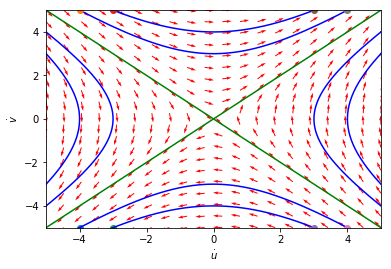

In [29]:
c=1

def f(Y, t):
    y1, y2 = Y
    return [y2, c*y1-1/2*y1**2]

y1 = np.linspace(-5,5,20)
y2 = np.linspace(-5,5,20)

Y1, Y2 = np.meshgrid(y1, y2)

t = 0

u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

NI, NJ = Y1.shape

for i in range(NI):
    for j in range(NJ):
        x = Y1[i, j]
        y = Y2[i, j]
        yprime = f([x, y], t)
        u[i,j] = yprime[0]/np.sqrt(yprime[0]**2+yprime[1]**2)
        v[i,j] = yprime[1]/np.sqrt(yprime[0]**2+yprime[1]**2)
for y10 in [-4,-3,3,4]:
    for y20 in [-5,5]:
        tspan = np.linspace(0, 10, 200)
        y0 = [y10,y20]
        ys = odeint(f, y0, tspan)
        plt.plot(ys[:,0], ys[:,1], 'b-')
        plt.plot([ys[0,0]], [ys[0,1]],'o') # start
        
for y20 in [-4,-3,3,4]:
    for y10 in [-5,5]:
        y0 = [y10,y20]
        ys = odeint(f, y0, tspan)
        plt.plot(ys[:,0], ys[:,1], 'b-')
        plt.plot([ys[0,0]], [ys[0,1]]) # start
        
plt.plot([-5,5],[5,-5],'g')
plt.plot([-5,5],[-5,5],'g')
Q = plt.quiver(Y1, Y2, u, v, color='r')

plt.xlim([-5,5])
plt.ylim([-5,5])

plt.xlabel('$\dot{u}$')
plt.ylabel('$\dot{v}$')
print 'Problem 6, nullclines shown in green'

#### Saddle at Origin Phase Plane

Here, I used $c=1$ for simplicity. With this $c$ value we have eigenvalues of $\pm1$. This gives us eigenvectors $\vec{v_{+1}}=\left(\begin{array}{c} 1 \\ 1\end{array}\right)$ and $\vec{v_{-1}}=\left(\begin{array}{c} 1 \\ -1\end{array}\right)$, which corresponds to the phase plot above.

* Not sure why the second fixed point at $(2c,0)$ isn't showing up on the phase portrait. Shouldn't it have eigenvalues $\pm\sqrt{-c}$? 

#### Homoclinic Solution


We must show that there is a homoclinic solution to $\dot{u}^2=cu^2-\frac{1}{3}u^3$. First, we can show that the system is conservative. Remembering that $\ddot{u}=-\frac{dV}{du}$, we can rewrite this equation as


$$ c\dot{u}u-\frac{1}{3}\dot{u}u^2-\dot{u}\ddot{u}=0 ~~~\longrightarrow~~~ \frac{d}{dt}\left[cu^2-\frac{1}{3}u^3+V(u)\right]=0 ~~~\longrightarrow~~~ $$

$$cu^2-\frac{1}{3}u^3+V(u)=E$$


Since the total energy is constant, the system is conservative.

We can also transform the equation $\dot{u}^2=cu^2-\frac{1}{3}u^3$ into the system

$$ \left(\begin{array}{cc} \dot{u} \\ \dot{v} \end{array}\right) = \left(\begin{array}{cc} v \\ cu-\frac{1}{3}u^2 \end{array}\right) $$

This gives us fixed points at the origin and at $(0,3c)$. With $c>0$, the origin is a saddle point and $(0,3c)$ is a center. Because of energy conservation, the trajectories are closed curves defined by the contours of constant energy. There is one homoclinic orbit that arcs around the center fixed point and connects the saddle fixed point to itself.

* I struggled with how to show this more rigorously. The class notes only showed examples of homoclinic orbits in systems with a saddle origin and _two_ symmetrical stable circles on either side. Since I couldn't get a phase portrait to reflect a homoclinic orbit, I don't think my derivations are correct for this problem. Suggestions?

#### Scaling Transformation

Here we want to make the transformation $u(\xi)~\rightarrow~\alpha u(\beta \xi)$ for the equation $\dot{u}^2=cu^2-\frac{1}{3}u^3$. Using the chain rule, we can say $u'(\xi) ~ \rightarrow ~ \alpha\beta u'(\beta\xi)$. With more substitutions, we get:

$$ \alpha^2\beta^2[u'(\beta\xi)]^2=c\alpha^2[u(\beta\xi)]^2-\frac{1}{3}\alpha^3[u(\beta\xi)]^3 ~~~\longrightarrow ~~~ \beta^2\dot{u}^2=cu^2-\frac{\alpha}{3}u^3 ~~~\longrightarrow ~~~ \dot{u}^2=\frac{c}{\beta^2}u^2-\frac{\alpha}{3}u^3 $$

Now we can make the substitution $u=\tilde{u}\cdot u_s$ and $\xi=\tau \cdot t_s$ This yields

$$ \left(\frac{d\tilde{u}}{d\tau}\cdot\frac{u_s}{t_s}\right)^2=\frac{c}{\beta^2}u_s^2~\tilde{u}^2-\frac{\alpha}{3}u_s^3~\tilde{u}^3 ~~~\longrightarrow ~~~ \left(\frac{d\tilde{u}}{d\tau}\right)^2=\frac{c}{\beta^2}t_s^2~\tilde{u}^2-\frac{\alpha}{3}t_s^2~u_s~\tilde{u}^3 $$

Now we can say $t_s^2=\frac{\beta^2}{c}$ and $u_s=\frac{3}{\alpha t_s^2}=\frac{3c}{\alpha\beta^2}$, giving us

$$ \dot{\tilde{u}}^2=\tilde{u}^2-\tilde{u}^3 $$

We were able to combine all starting parameters, then omit them entirely. From this result we can say that this system operates on a single time scale. In addition, the influence of the wave speed $c$ decreases with the rise in either $\alpha$ or $\beta$, and visa versa. 

#### The Rest

Because the left hand side of the equation $\dot{u}^2=u^2-u^3$ is non-negative, then the right side cannot be negative. In order for $u^2>u^3$ with non-negative $u$, $0<u\leq 1$. To solve, we isolate $\dot u$ and separate the variables.

$$ \dot u=\pm\sqrt{u^2-u^3} ~~~ \longrightarrow ~~~ \frac{du}{d\xi}=\pm u\sqrt{1-u} ~~~ \longrightarrow ~~~ d\xi=\pm\frac{du}{u\sqrt{1-u}} $$

Integrating both sides, we get

$$ \xi=\pm\int_u^1\frac{dt}{t\sqrt{1-t}} $$

Using the substitution $t=\sin^2\theta$, we get

$$\int\frac{2\sin\theta\cos\theta}{\sin^2\theta\sqrt{1-\sin^2\theta}}d\theta ~~~ \longrightarrow ~~~ 2\int\frac{d\theta}{\sin\theta} ~~~ \longrightarrow ~~~ 2\ln|\csc\theta-\cot\theta|$$

re-substituting for $\csc\theta=t^{-1/2}$ and $\cot\theta=(1-t)^{1/2}t^{-1/2}$, we have

$$ \xi=\pm2\ln\left|t^{-1/2}(1-(1-t)^{1/2}\right|_u^1=\pm2\ln\left|\frac{\sqrt{u}}{1-\sqrt{1-u}}\right| $$

Now to invert this solution to get a function in terms of $\xi$. Let $u=1-x^2$. Then 

$$ e^{\xi}=\pm\frac{1-x^2}{(1-x)^2}=\pm\frac{1+x}{1-x} $$

Solving for $x$, we have

$$ x=\frac{e^\xi\pm1}{e^\xi\mp2} $$

With re-substitution, we simply get

$$ u(\xi)=\pm\frac{4e^\xi}{(e^\xi-1)^2} $$

Using the transformation $u(\xi)=\alpha u(\beta\xi)$ from before, we can say

$$ u(\xi)=\pm\frac{4\alpha e^{\xi\beta}}{(e^{\xi\beta}-1)^2} $$

 Here we can see that $u(\xi)\to 0$ as $\beta\to\pm\infty$ and $u(\xi)\to 0$ as $\alpha\to 0$. In terms of $c$, I gather that it ultimately does not dramatically alter the scales in the overall dynamics of the system.

**Total**: 26/30